# Homework 1
    Chess game  
    Gianluca Rea

## Libraries and variables definition

In [1]:
import chess
import time
import random

In [2]:
picesCost = {
    "n": 0,
    "p": 1,
    "b": 3,
    "k": 3,
    "r": 5,
    "q": 9
}

## Heuristics

In [3]:
# Heuristic based on the number of feasible moves
def numberOfMoves(boardState:chess.Board):
    return boardState.legal_moves.count()

In [4]:
### Heuristic based on the number of pieces and their cost 
### minus the number of pieces and their cost of the opponent 
### numero di pezzi per il loro costo

def materialH(boardState:chess.Board, color:str):
    pieces: str = boardState.board_fen()
    if(color == "white"):
        return (sum(picesCost[piece.lower()] for piece in pieces if piece.isupper() and piece.isalpha())) - (sum(picesCost[piece.lower()] for piece in pieces if piece.islower() and piece.isalpha()))
    return (sum(picesCost[piece.lower()] for piece in pieces if piece.islower() and piece.isalpha())) - (sum(picesCost[piece.lower()] for piece in pieces if piece.isupper() and piece.isalpha()))

In [5]:
### Heuristic based on the number of pieces minus the number of pieces of the opponent
def numberPieces(boardState:chess.Board, color:str):
    pieces: str = boardState.board_fen()
    if(color == "white"):
        return (sum(1 for piece in pieces if piece.isupper() and piece.isalpha())) - (sum(1 for piece in pieces if piece.islower() and piece.isalpha()))
    return (sum(1 for piece in pieces if piece.islower() and piece.isalpha())) - (sum(1 for piece in pieces if piece.isupper() and piece.isalpha()))

In [6]:
### The heuristic makeNumberOfMoves returns the best move compared to the numberOfMoves heuristic defined previously
### In the specific case we always choose the move that can create the check or checkmate situation 
### Also, this function creates a list of global min of the heuristic, if there is more than one global min the choise is made randomly

def makeNumberOfMoves(boardState:chess.Board):
    boardStates = []
    heuristicValues = []
    for move in boardState.legal_moves:
        newBoard: chess.Board = boardState.copy()
        newBoard.push_uci(str(move))
        boardStates.append(newBoard)
        heuristicValues.append(numberOfMoves(newBoard))
        if newBoard.is_check() or newBoard.is_checkmate(): 
            return newBoard
    indexMin = random.choice([i for i, x in enumerate(heuristicValues) if x == max(heuristicValues)])

    return boardStates[indexMin]

In [7]:
### The heuristic makeMaterialH returns the best move compared to the materialH heuristic defined previously
### In the specific case we always choose the move that can create the check or checkmate situation 
### Also, this function creates a list of global min of the heuristic, if there is more than one global min the choise is made randomly
def makeMaterialH(boardState:chess.Board, color):
    boardStates = []
    heuristicValues = []
    for move in boardState.legal_moves:
        newBoard: chess.Board = boardState.copy()
        newBoard.push_uci(str(move))
        boardStates.append(newBoard)
        heuristicValues.append(materialH(newBoard, color))
        if newBoard.is_check() or newBoard.is_checkmate(): 
            return newBoard
    indexMin = random.choice([i for i, x in enumerate(heuristicValues) if x == max(heuristicValues)])

    return boardStates[indexMin]


In [8]:
### The heuristic makeNumberPieces returns the best move compared to the numberPieces heuristic defined previously
### In the specific case we always choose the move that can create the check or checkmate situation 
### Also, this function creates a list of global min of the heuristic, if there is more than one global min the choise is made randomly

def makeNumberPieces(boardState:chess.Board, color):
    boardStates = []
    heuristicValues = []
    for move in boardState.legal_moves:
        newBoard: chess.Board = boardState.copy()
        newBoard.push_uci(str(move))
        boardStates.append(newBoard)
        heuristicValues.append(numberPieces(newBoard, color))
        if newBoard.is_check() or newBoard.is_checkmate(): 
            return newBoard
    indexMin = random.choice([i for i, x in enumerate(heuristicValues) if x == max(heuristicValues)])

    return boardStates[indexMin]

## Agents

In [9]:
## Agent that implements numberOfMoves heuristic
def agentsNumberOfMoves():
    startTime = time.time()
    board = chess.Board()
    while(not board.is_checkmate() and not board.is_fifty_moves() and not board.is_insufficient_material() and not board.is_stalemate() and not board.is_fivefold_repetition()):
        if (board.turn):
            board = makeNumberOfMoves(board)
        else:
            board = makeNumberOfMoves(board)
       

    if(board.is_fifty_moves()):
        print("55 moves gained, it's draw")
    if(board.is_fivefold_repetition()):
        print("fivefold repetition, it's draw")
    elif (board.is_checkmate()):
        if(board.turn):
            print("White is under checkmate, black wins")
        else:
            print("Black is under checkmate, white wins")
    if (board.is_insufficient_material()): 
        print("Insufficient material, it's draw")
    
    print("--- %s seconds ---" % (time.time() - startTime))

    return board

In [10]:
## Agent that implements materialH heuristic
def agentsMaterialH():
    startTime = time.time()
    board = chess.Board()
    while(not board.is_checkmate() and not board.is_fifty_moves() and not board.is_insufficient_material() and not board.is_stalemate() and not board.is_fivefold_repetition()):
        if (board.turn):
            board = makeMaterialH(board, "white")
        else:
            board = makeMaterialH(board, "black")
        

    if(board.is_fifty_moves()):
        print("55 moves gained, it's draw")
    if(board.is_fivefold_repetition()):
        print("fivefold repetition, it's draw")
    elif (board.is_checkmate()):
        if(board.turn):
            print("White is under checkmate, black wins")
        else:
            print("Black is under checkmate, white wins")
    if (board.is_insufficient_material()): 
        print("Insufficient material, it's draw")
        
    print("--- %s seconds ---" % (time.time() - startTime))

    return board

In [11]:
## Agent that implements numberPieces heuristic
def agentsNumberPieces():
    startTime = time.time()
    board = chess.Board()
    while(not board.is_checkmate() and not board.is_fifty_moves() and not board.is_insufficient_material() and not board.is_stalemate() and not board.is_fivefold_repetition()):
        if (board.turn):
            board = makeNumberPieces(board, "white")
        else:
            board = makeNumberPieces(board, "black")
        

    if(board.is_fifty_moves()):
        print("55 moves gained, it's draw")
    if(board.is_fivefold_repetition()):
        print("fivefold repetition, it's draw")
    elif (board.is_checkmate()):
        if(board.turn):
            print("White is under checkmate, black wins")
        else:
            print("Black is under checkmate, white wins")
    if (board.is_insufficient_material()): 
        print("Insufficient material, it's draw")
    print("--- %s seconds ---" % (time.time() - startTime))

    return board

In [12]:
### White Agent implements numberPieces heuristic
### Black Agent implements materialH heuristic
def agentsNumberPiecesAndMaterialH():
   
    startTime = time.time()
    board = chess.Board()
    while(not board.is_checkmate() and not board.is_fifty_moves() and not board.is_insufficient_material() and not board.is_stalemate() and not board.is_fivefold_repetition()):
        if (board.turn):
            board = makeNumberPieces(board, "white")
        else:
            board = makeMaterialH(board, "black")
        
    if(board.is_fifty_moves()):
        print("55 moves gained, it's draw")
    if(board.is_fivefold_repetition()):
        print("fivefold repetition, it's draw")
    elif (board.is_checkmate()):
        if(board.turn):
            print("White is under checkmate, black wins")
        else:
            print("Black is under checkmate, white wins")
    if (board.is_insufficient_material()): 
        print("Insufficient material, it's draw")
    
    print("--- %s seconds ---" % (time.time() - startTime))

    return board

## Examples

White is under checkmate, black wins
--- 0.09416007995605469 seconds ---


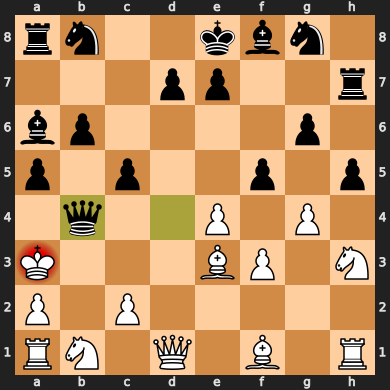

In [17]:
# Example using the agent agentsNumberOfMoves
board = agentsNumberOfMoves()
board

Insufficient material, it's draw
--- 0.43210411071777344 seconds ---


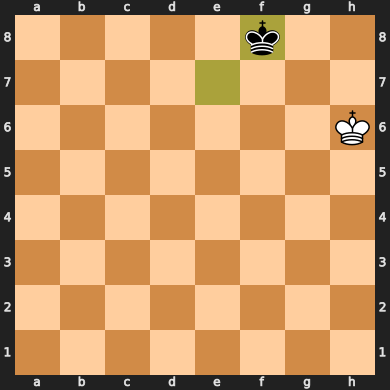

In [18]:
# Example using the agent agentsMaterialH
board = agentsMaterialH()
board

Insufficient material, it's draw
--- 0.3857607841491699 seconds ---


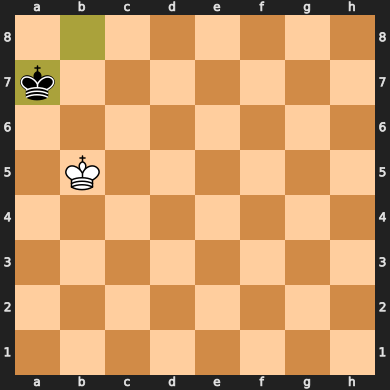

In [19]:
# Example using the agent agentsNumberPieces
board = agentsNumberPieces()
board

Insufficient material, it's draw
--- 0.3886990547180176 seconds ---


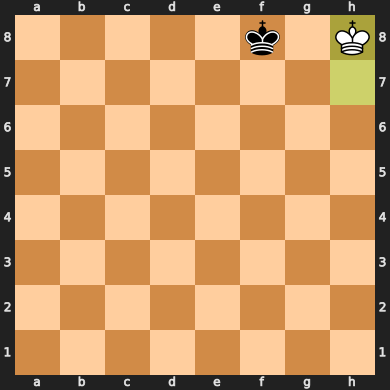

In [20]:
# Example using the agent agentsNumberPiecesAndMaterialH
board = agentsNumberPiecesAndMaterialH()
board